# Horse race competition analysis

# Import Dataset

In [ ]:
# Sklearn and Pandas Setup
import json
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from wordcloud import WordCloud

In [ ]:
import os
import gdown
from google.colab import drive

if not os.path.exists('./data'):
    os.mkdir('./data')


In [ ]:
drive.mount('/content/drive')

data_path_race = '/content/drive/MyDrive/Copy of races.csv'
data_path_run = '/content/drive/MyDrive/Copy of runs.csv'

import pandas as pd
race_df = pd.read_csv(data_path_race)
run_df = pd.read_csv(data_path_run)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
race_df

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,6344,2005-08-28,ST,6,A,0,1400,GOOD,115-95,2500000.0,...,5.0,NaN,13.5,14.5,62.5,NaN,6,38.0,NaN,NaN
6345,6345,2005-08-28,ST,7,A,0,1600,GOOD,G,23000000.0,...,14.0,NaN,18.0,20.5,45.0,NaN,5,60.0,NaN,NaN
6346,6346,2005-08-28,ST,8,A,0,2000,GOOD,G,25000000.0,...,5.0,NaN,11.0,27.5,38.5,NaN,2,17.5,NaN,NaN
6347,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,...,4.0,NaN,11.0,37.0,21.5,NaN,9,16.0,NaN,NaN


In [ ]:
run_df

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95


### Clean the data

In [ ]:
print("Original Race Data Info:")
print(race_df.info())

Original Race Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   race_id             6349 non-null   int64  
 1   date                6349 non-null   object 
 2   venue               6349 non-null   object 
 3   race_no             6349 non-null   int64  
 4   config              6349 non-null   object 
 5   surface             6349 non-null   int64  
 6   distance            6349 non-null   int64  
 7   going               6349 non-null   object 
 8   horse_ratings       6349 non-null   object 
 9   prize               5887 non-null   float64
 10  race_class          6349 non-null   int64  
 11  sec_time1           6349 non-null   float64
 12  sec_time2           6349 non-null   float64
 13  sec_time3           6349 non-null   float64
 14  sec_time4           3634 non-null   float64
 15  sec_time5           821 non-nu

In [ ]:
print("Original Run Data Info:")
print(run_df.info())

Original Run Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  i

### Check missing value and zeros

In [ ]:
missing_values = race_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
prize                  462
sec_time4             2715
sec_time5             5528
sec_time6             6234
sec_time7             6349
time4                 2715
time5                 5528
time6                 6234
time7                 6349
place_combination3      25
place_combination4    6326
place_dividend3         25
place_dividend4       6326
win_combination2      6337
win_dividend2         6337
dtype: int64


I wish I could get more information on the missing values.
Assumptions:



1.   some sec_time are nan because the race total distance is short. So all the missing values related to section time with be replaced with zeros.
2.   some races wont release info about the 4th place, because of large amount of null values in place_combination4 and place_dividend 4, we will delete the two conlumns.
3. some competition do not have a joint winner, for now, we will delete the two columns
4. for the rest, we will use knn later to fill the values


In [ ]:
columns_to_replace_with_zero = ['sec_time4', 'sec_time5', 'sec_time6', 'sec_time7', 'time4', 'time5','time6','time7', 'prize']
column_to_drop = ['place_combination4', 'place_dividend4', 'win_combination2', 'win_dividend2']
columns_to_median = ['place_dividend3']



# Replace NaN values with zero/mean/median in the specified columns
race_df[columns_to_replace_with_zero] = race_df[columns_to_replace_with_zero].fillna(0)
race_df[columns_to_median]= race_df[columns_to_median].fillna(race_df[columns_to_median].median())

# Drop the specified column
race_df = race_df.drop(column_to_drop, axis=1)

race_df[['sec_time4', 'sec_time5']]

,sec_time4,sec_time5
0,23.58,0.00
1,0.00,0.00
2,22.82,0.00
3,0.00,0.00
4,23.56,0.00
...,...,...
6344,21.78,0.00
6345,23.45,0.00
6346,23.46,24.15
6347,0.00,0.00


In [ ]:
zero_counts = (race_df == 0).sum()

# Display the counts of zeros for each column
print("Number of Zeros in Each Column:")
print(zero_counts[zero_counts > 0])

Number of Zeros in Each Column:
race_id          1
surface       5656
prize          462
race_class      12
sec_time4     2715
sec_time5     5528
sec_time6     6234
sec_time7     6349
time4         2715
time5         5528
time6         6234
time7         6349
dtype: int64


In [ ]:
missing_values = run_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
horse_country        2
horse_type           2
position_sec4    33221
position_sec5    69368
position_sec6    78151
behind_sec4      33221
behind_sec5      69368
behind_sec6      78151
time4            33221
time5            69368
time6            78151
place_odds        3735
dtype: int64


For the same reason, every sectional time, we will replace them with zero.

In [ ]:
columns_to_replace_with_zero = ['position_sec4', 'position_sec5', 'position_sec6', 'behind_sec4','behind_sec5','behind_sec6', 'time4', 'time5','time6']
columns_to_mean = ['place_odds']

# Replace NaN values with zero in the specified columns
run_df[columns_to_replace_with_zero] = run_df[columns_to_replace_with_zero].fillna(0)
run_df[columns_to_mean] = run_df[columns_to_mean].fillna(run_df[columns_to_mean].mean())


In [ ]:
zero_counts = (run_df == 0).sum()

# Display the counts of zeros for each column
print("Number of Zeros in Each Column:")
print(zero_counts[zero_counts > 0])

Number of Zeros in Each Column:
race_id              14
horse_id             39
won               73087
lengths_behind     6360
position_sec4     33221
position_sec5     69368
position_sec6     78151
behind_sec3          14
behind_sec4       33232
behind_sec5       69368
behind_sec6       78153
time4             33221
time5             69368
time6             78151
trainer_id            1
jockey_id             4
dtype: int64


Drop empty rows and columns

In [ ]:
race_df = race_df.dropna(axis = 0, how = 'all')
race_df = race_df.dropna(axis=1, how='all')
race_df.drop_duplicates(inplace = True)
run_df = run_df.dropna(axis = 0, how = 'all')
run_df = run_df.dropna(axis=1, how='all')
run_df.drop_duplicates(inplace = True)

In [ ]:
race_df.shape

(6349, 33)

In [ ]:
run_df.shape

(79447, 37)

# EDA

In [ ]:
race_df.describe()

,race_id,race_no,surface,distance,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,...,time6,time7,place_combination1,place_combination2,place_combination3,place_dividend1,place_dividend2,place_dividend3,win_combination1,win_dividend1
count,6349.000000,6349.000000,6349.000000,6349.000000,6.349000e+03,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,...,6349.000000,6349.0,6349.00000,6349.000000,6324.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000
mean,3174.000000,5.226807,0.109151,1419.113246,1.052215e+06,3.893684,20.699466,22.826749,23.830743,13.652744,...,2.542167,0.0,6.23862,6.366357,6.525933,27.778469,32.802536,38.924130,6.238620,96.096944
std,1832.942761,2.795019,0.311853,281.468745,1.709905e+06,1.992868,5.880319,1.044998,0.870355,11.818058,...,18.730138,0.0,3.61858,3.662594,3.731685,25.175925,30.275423,36.949961,3.620321,131.221259
min,0.000000,1.000000,0.000000,1000.000000,0.000000e+00,0.000000,12.390000,20.060000,21.200000,0.000000,...,0.000000,0.0,1.00000,1.000000,1.000000,10.100000,10.100000,10.100000,1.000000,10.500000
25%,1587.000000,3.000000,0.000000,1200.000000,6.250000e+05,3.000000,13.690000,22.140000,23.210000,0.000000,...,0.000000,0.0,3.00000,3.000000,3.000000,15.000000,17.000000,18.500000,3.000000,34.500000
50%,3174.000000,5.000000,0.000000,1400.000000,8.000000e+05,4.000000,23.720000,22.800000,23.720000,22.980000,...,0.000000,0.0,6.00000,6.000000,6.000000,20.000000,24.000000,27.500000,6.000000,58.500000
75%,4761.000000,7.000000,0.000000,1650.000000,1.000000e+06,4.000000,24.700000,23.450000,24.380000,23.900000,...,0.000000,0.0,9.00000,9.000000,10.000000,31.000000,36.500000,44.000000,9.000000,105.500000
max,6348.000000,11.000000,1.000000,2400.000000,2.500000e+07,13.000000,30.030000,27.410000,27.580000,28.920000,...,158.490000,0.0,14.00000,14.000000,14.000000,410.500000,627.000000,420.500000,14.000000,2687.500000


In [ ]:
run_df.describe()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,...,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000
mean,3173.352814,6.905623,2204.410525,6.838597,0.080053,6.108901,3.339346,61.034904,1104.953568,122.729656,...,22.928985,23.864054,13.987405,3.058096,0.397219,85.322914,28.812977,7.423177,79.793007,85.832341
std,1833.101494,3.760711,1275.049375,3.730498,0.271378,33.636209,0.876763,11.748788,62.347597,6.305496,...,3.599727,3.571163,12.379825,8.032828,3.089157,18.512883,30.097375,8.613525,45.118874,54.338105
min,0.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,...,19.990000,21.000000,0.000000,0.000000,0.000000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,1586.000000,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,...,22.290000,23.230000,0.000000,0.000000,0.000000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,3174.000000,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,...,22.870000,23.760000,23.010000,0.000000,0.000000,83.350000,15.000000,4.400000,75.000000,76.000000
75%,4764.500000,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,...,23.520000,24.410000,24.050000,0.000000,0.000000,100.780000,38.000000,8.200000,118.000000,138.000000
max,6348.000000,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,...,999.000000,999.000000,999.000000,49.570000,34.150000,163.580000,99.000000,101.000000,175.000000,185.000000


### Correlation matrix

In [ ]:
new_column_names = {
                    'time1': 'time1_lead',
                    'time2': 'time2_lead',
                    'time3': 'time3_lead',
                    'time4': 'time4_lead',
                    'time5': 'time5_lead',
                    'time6': 'time6_lead'}

race_df.rename(columns=new_column_names, inplace=True)

In [ ]:

full_df = pd.merge(race_df, run_df, on='race_id', how='inner')

In [ ]:
corr_matrix = full_df.corr()


<ipython-input-21-422b5448a9b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = full_df.corr()


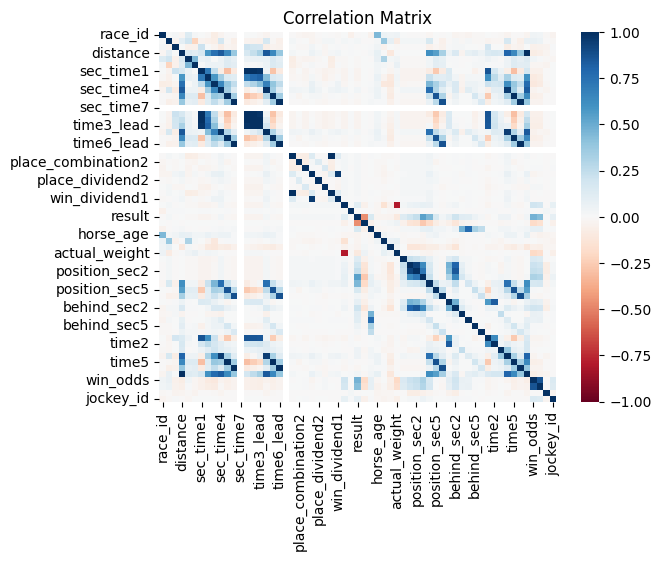

In [ ]:
#a simple visualization
sns.heatmap(corr_matrix, cmap='RdBu', vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix")
plt.show()

We observed that in race_df, time1_lead, time2_lead, time3_lead, time4_lead, time5_lead, time6_lead,all of these features have a high correlation with each other. By checking the data dictionary, time x implies the time taken by the **lead** horse to pass through the xth section of the race (sec).

In [ ]:
race_df[['sec_time1', 'sec_time2','sec_time3','time1_lead', 'time2_lead', 'time3_lead', 'time4_lead', 'time5_lead']]

,sec_time1,sec_time2,sec_time3,time1_lead,time2_lead,time3_lead,time4_lead,time5_lead
0,13.53,21.59,23.94,13.53,35.12,59.06,82.64,0.00
1,24.05,22.64,23.70,24.05,46.69,70.39,0.00,0.00
2,13.77,22.22,24.88,13.77,35.99,60.87,83.69,0.00
3,24.33,22.47,22.09,24.33,46.80,68.89,0.00,0.00
4,25.45,23.52,23.31,25.45,48.97,72.28,95.84,0.00
...,...,...,...,...,...,...,...,...
6344,13.65,23.10,24.60,13.65,36.75,61.35,83.13,0.00
6345,24.48,22.54,23.01,24.48,47.02,70.03,93.48,0.00
6346,26.79,23.31,23.24,26.79,50.10,73.34,96.80,120.95
6347,23.65,22.54,22.97,23.65,46.19,69.16,0.00,0.00


In [ ]:
run_df[['time1', 'time2', 'time3', 'time4', 'time5', 'time6']]

,time1,time2,time3,time4,time5,time6
0,13.85,21.59,23.86,24.62,0.0,0.0
1,14.57,21.99,23.30,23.70,0.0,0.0
2,13.69,21.59,23.90,24.22,0.0,0.0
3,14.09,21.83,23.70,24.00,0.0,0.0
4,14.77,21.75,23.22,23.50,0.0,0.0
...,...,...,...,...,...,...
79442,26.14,23.98,23.53,22.52,0.0,0.0
79443,25.82,24.10,23.77,22.61,0.0,0.0
79444,26.58,24.06,23.37,22.43,0.0,0.0
79445,26.58,24.02,23.45,22.29,0.0,0.0


Futher check, we observed that by definition: sec_time is the time taken by the leader of the race to reach the end of the end of the xst sectional point (sec), while time_x is the time taken by the leader of the race in the xst section only (sec), meaning that time_x is the sum of all sectional time till section x.  $$ time \text{
  _x} = sum_{i} sec\text{_}time_i$$, with i = 0 to x.

And $$ time \text{ _x} = time \text{ _x - 1} + sec\text{_}time_x$$, with i = 0 to x.


Therefore, no wonder why time1_lead, time2_lead, time3_lead, time4_lead, time5_lead, time6_lead, time7_lead, has a high correlation with each other as they are just calculated from the previous one. And high correlation is also shown in sec_time1 and time1 because sec_time1 is basically equal to time1.





### Drop time_x_lead columns

In [ ]:
full_df.drop(['time1_lead', 'time2_lead', 'time3_lead', 'time4_lead', 'time5_lead', 'time6_lead'], axis=1, inplace=True)

### Which country's horse runs the fastest

In [ ]:

full_df['average_speed'] = full_df['distance']/full_df['finish_time']
average_speed_by_horse = full_df.groupby('horse_id')['average_speed'].mean()

full_df['average_speed_by_horse'] = full_df['horse_id'].map(average_speed_by_horse)

average_speed_by_country = full_df.groupby('horse_country')['average_speed_by_horse'].mean()

fastest_country = average_speed_by_country.idxmax()
max_average_speed = average_speed_by_country.max()

print(f'The country with the fastest horses is {fastest_country} with an average speed of {max_average_speed:.2f} m/s.')

The country with the fastest horses is GR with an average speed of 16.95 m/s.


In [ ]:
average_speed_by_country

horse_country
ARG    16.551494
AUS    16.773746
BRZ    16.420535
CAN    16.497605
FR     16.589216
GB     16.718963
GER    16.421542
GR     16.951202
IRE    16.652967
ITY    16.732189
JPN    16.638194
NZ     16.679905
SAF    16.823897
SPA    16.863105
USA    16.616122
ZIM    16.435112
Name: average_speed_by_horse, dtype: float64

### Ten horses stars who are consistently winning

In [ ]:
winning_horses = full_df[full_df['won'] == 1]
horse_race_counts = winning_horses['horse_id'].value_counts()

top_ten_winning_horses = horse_race_counts.head(10)

print(f'Top ten horses that always win:')
print(top_ten_winning_horses)

Top ten horses that always win:
1960    13
1033    12
1067    11
2558    10
4300    10
2523    10
493     10
2169     9
3728     9
1594     9
Name: horse_id, dtype: int64


### Ten best jockey

In [ ]:
jockey_win_counts = full_df[full_df['won'] == 1]['jockey_id'].value_counts()

#Identify the top ten jockeys with the highest number of wins
top_ten_jockeys = jockey_win_counts.head(10)

# Display the result
print(f'Top ten horse riders with the highest number of wins:')
print(top_ten_jockeys)

Top ten horse riders with the highest number of wins:
2      707
64     607
18     495
95     464
50     305
138    273
162    206
63     200
91     195
40     193
Name: jockey_id, dtype: int64


### Age distribution of horses

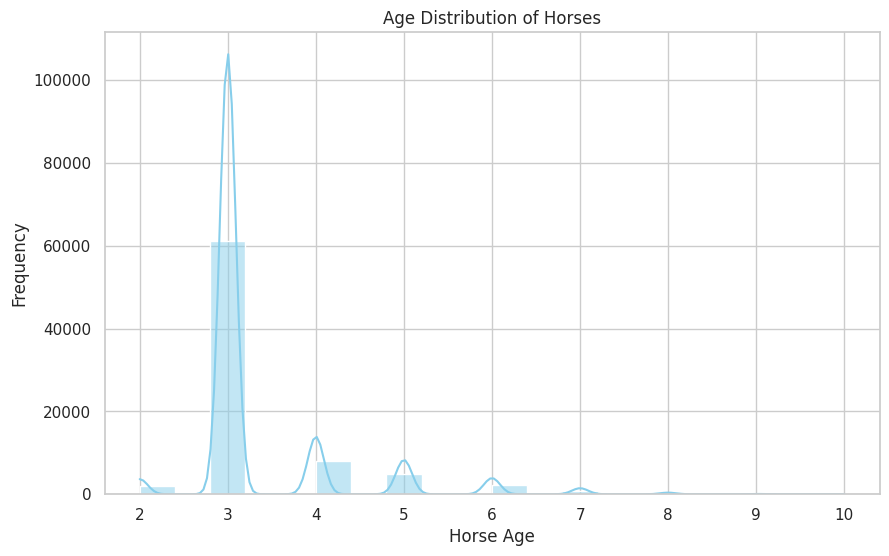

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the age distribution
sns.histplot(run_df['horse_age'], bins=20, kde=True, color='skyblue')

# Adding labels and title
plt.title('Age Distribution of Horses')
plt.xlabel('Horse Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Add some interesting columns for analysis

Horses that run smoonthly will have a higher chance of success ; if the section time are erratic for a split, horses might experience difficulties maintaining a consistent pace, affecting their overall performance in the race. Therefore, the strong correlation among these time features suggests that the horses tend to maintain a consistent speed across multiple sections of the race. This insight could be valuable for understanding the factors contributing to a horse's performance and may be considered when analyzing and predicting race outcomes.

### Create columns of measuring smoothness

I choose to add columns named smoothness_lead, smoothness_run to represent the average of the sum of squared differences between sectional time between horses.

In [ ]:
full_df['time5'].fillna(0, inplace=True)
full_df['time6'].fillna(0, inplace=True)

column_pairs = [('time1', 'time2'), ('time2', 'time3'), ('time3', 'time4'),('time4', 'time5'),('time5', 'time6')]

full_df['smoothness'] = 0

# Calculate and add sum of squared differences for each pair
for pair in column_pairs:
    col1, col2 = pair
    full_df['smoothness'] = full_df['smoothness']+ ((full_df[col1] - full_df[col2]) ** 2)

full_df['smoothness'] /= len(column_pairs)

In [ ]:
full_df['smoothness']

0        134.35650
1        123.72450
2        130.89138
3        127.89890
4        120.64194
           ...    
79442    102.60772
79443    103.12500
79444    102.16300
79445    101.01364
79446    107.36652
Name: smoothness, Length: 79447, dtype: float64

In [ ]:
from tabulate import tabulate
# Get the top 10 horses with the maximum average speed
top_10_smoothness_horses = full_df[['horse_id', 'smoothness']].nsmallest(10, 'smoothness')

# Display the beautiful table
table = tabulate(top_10_smoothness_horses, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+
| horse_id |     smoothness      |
+----------+---------------------+
|  2304.0  | 0.3438200000000002  |
|  4064.0  | 0.4379999999999991  |
|  2023.0  | 0.47357999999999995 |
|  2600.0  | 0.4816800000000002  |
|  1437.0  | 0.5129599999999993  |
|  1190.0  | 0.5269599999999999  |
|  3855.0  | 0.5409399999999996  |
|  1438.0  | 0.5420599999999995  |
|  2601.0  | 0.5458400000000005  |
|  245.0   | 0.5495199999999997  |
+----------+---------------------+


### Average Speed of a horse

In [ ]:

full_df['average_speed'] = full_df['distance']/full_df['finish_time']

#Calculate the average speed for each race
average_speed_by_horse = full_df.groupby('horse_id')['average_speed'].mean()

full_df['average_speed_by_horse'] = full_df['horse_id'].map(average_speed_by_horse)


full_df[['average_speed_by_horse']]

,average_speed_by_horse
0,16.115288
1,16.167011
2,16.908245
3,16.516946
4,16.509080
...,...
79442,17.077548
79443,16.551597
79444,16.897041
79445,16.963182


In [ ]:
from tabulate import tabulate
# Get the top 10 horses with the maximum average speed
top_10_horses = full_df[['horse_id', 'average_speed']].nlargest(10, 'average_speed')

# Display the beautiful table
table = tabulate(top_10_horses, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+--------------------+
| horse_id |   average_speed    |
+----------+--------------------+
|  1792.0  | 18.12907904278463  |
|  3931.0  |  18.1257930034439  |
|  450.0   | 18.109380659181458 |
|  1154.0  | 18.066847335140018 |
|  2045.0  | 18.060321473722233 |
|  3661.0  | 18.057060310581438 |
|   85.0   | 18.044027426921687 |
|  1154.0  | 18.021265092809514 |
|  2577.0  | 18.021265092809514 |
|  3000.0  | 18.021265092809514 |
+----------+--------------------+


In [ ]:
from tabulate import tabulate
# Get the top 10 horses with the maximum average speed
top_10_horses = full_df.groupby('horse_id')['average_speed_by_horse'].mean().nlargest(10).reset_index()

# Display the beautiful table
table = tabulate(top_10_horses, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+------------------------+
| horse_id | average_speed_by_horse |
+----------+------------------------+
|  3334.0  |   17.85285613189116    |
|   41.0   |   17.604608886737502   |
|  3573.0  |   17.602534765006162   |
|  1154.0  |   17.594492913058435   |
|  2577.0  |   17.57535300171229    |
|  4365.0  |   17.55889712523835    |
|  450.0   |   17.556976743844633   |
|  1792.0  |   17.55261745228145    |
|  3317.0  |   17.550332878800035   |
|  3241.0  |   17.53777831820164    |
+----------+------------------------+


### Average Speed of this horse type

In [ ]:
# Create a new column for average speed
full_df['average_speed'] = full_df['distance']/full_df['finish_time']

# Calculate the average speed for each race
average_speed_by_horse = full_df.groupby('horse_type')['average_speed'].mean()

full_df['average_speed_by_type'] = full_df['horse_type'].map(average_speed_by_horse)
full_df['average_speed_by_type'].fillna(full_df['average_speed_by_type'].mean(), inplace=True)

full_df[['average_speed_by_type']].head(20)

,average_speed_by_type
0,16.711415
1,16.711415
2,16.711415
3,16.711415
4,16.711415
5,16.711415
6,16.711415
7,16.711415
8,16.711415
9,16.719974


## Preprocessing

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 79446
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   race_id                 79447 non-null  int64  
 1   date                    79447 non-null  object 
 2   venue                   79447 non-null  object 
 3   race_no                 79447 non-null  int64  
 4   config                  79447 non-null  object 
 5   surface                 79447 non-null  int64  
 6   distance                79447 non-null  int64  
 7   going                   79447 non-null  object 
 8   horse_ratings           79447 non-null  object 
 9   prize                   79447 non-null  float64
 10  race_class              79447 non-null  int64  
 11  sec_time1               79447 non-null  float64
 12  sec_time2               79447 non-null  float64
 13  sec_time3               79447 non-null  float64
 14  sec_time4               79447 non-null

# Classification

## Bet after the race: being omniscient

Take out columns that are not so relevant, or has too much values to do one hot encoing

In [ ]:
features = full_df.drop(columns=['date','horse_gear'], axis = 1)
# full_cat = full_df[[ 'venue', 'config', 'going', 'horse_gear', 'horse_country', 'horse_type']]
# features_num = full_df.drop(columns=['date', 'venue', 'config', 'going', 'horse_gear', 'horse_country', 'horse_type'])

Set up for modeling, drop out the final results, but can keep info such as dividends, who is the second/third place etc.

In [ ]:
#drop the info you wouldn't know before the end
features = features.drop(columns=['finish_time', 'win_combination1', 'won', 'result', 'lengths_behind','place_combination1'], axis = 1)
#store the binary classification target variable as "labels"
labels = full_df['win_combination1']

One hot encoding

In [ ]:
features = pd.get_dummies(features)

### KNN

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the training data
X_train_imputed = knn_imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer
X_test_imputed = knn_imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames if needed
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

### Balance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced_end, y_train_balanced_end = smote.fit_resample(X_train_imputed_df, y_train)


### Model

In [ ]:
rf_end = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_end.fit(X_train_balanced_end, y_train_balanced_end)


predictions_end = rf_end.predict(X_test_imputed_df)

train_acc_end = rf_end.score(X_train_balanced_end, y_train_balanced_end)
test_acc_end = rf_end.score(X_test_imputed_df, y_test)

In [ ]:
train_acc_end

1.0

In [ ]:
test_acc_end

1.0

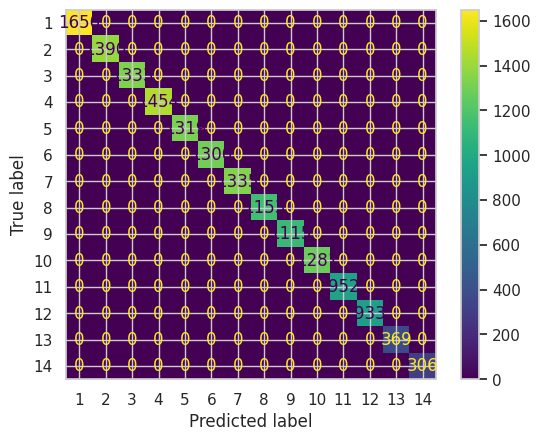

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and predictions_pca are your true labels and predicted labels, respectively

# Ensure that class_labels correspond to the unique classes in your data
class_labels = sorted(np.unique(np.concatenate((y_test, predictions_end))))

confusion_matrix = metrics.confusion_matrix(y_test, predictions_end)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)

cm_display.plot()
plt.show()

### Feature analysis

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

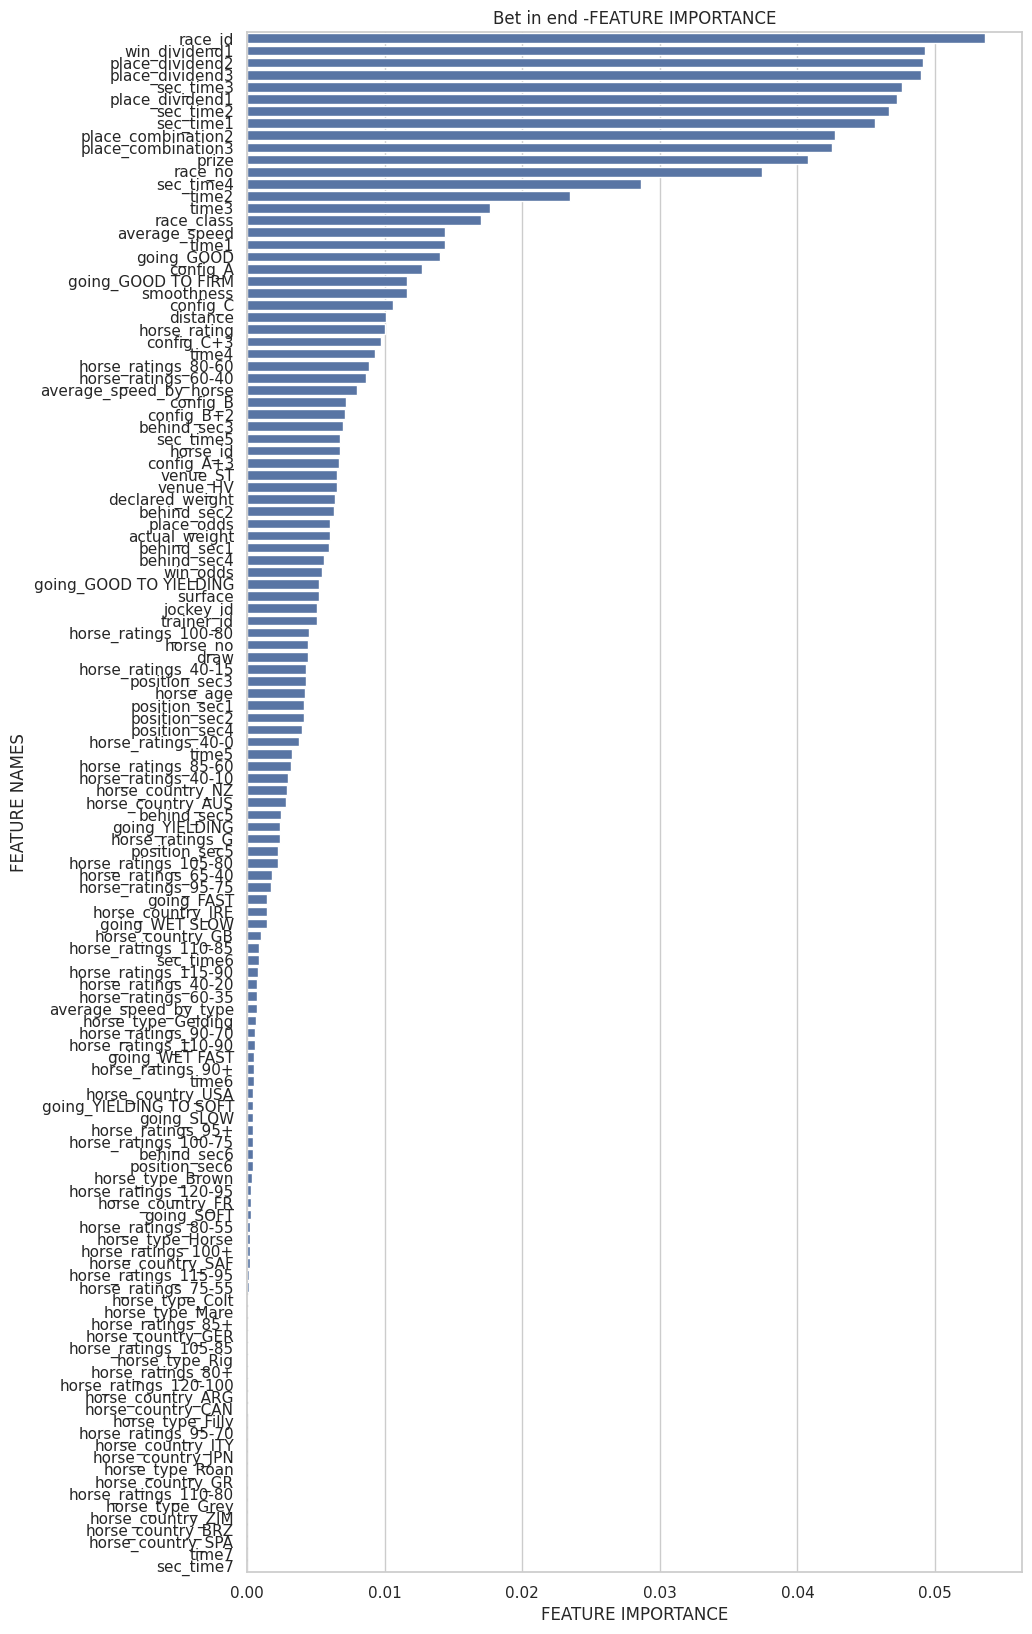

In [ ]:
plot_feature_importance(rf_end.feature_importances_,X_train_balanced_end.columns,'Bet in end -')

## Bet in the middle of race

We want to know if you don't know the the dividend or the final place, for example, 'place_combination1', 'place_dividend1', 'place_dividend2'. We are relying on information only available before the race and sectional times in the middle of competition. How would you bet?

Take out columns that are not so relevant, or has too much values to do one hot encoing

In [ ]:
features = full_df.drop(columns=['date','horse_gear'], axis = 1)
# full_cat = full_df[[ 'venue', 'config', 'going', 'horse_gear', 'horse_country', 'horse_type']]
# features_num = full_df.drop(columns=['date', 'venue', 'config', 'going', 'horse_gear', 'horse_country', 'horse_type'])

Set up for modeling

In [ ]:
#drop the info you wouldn't know before the end
features = features.drop(columns=['finish_time', 'win_combination1', 'won', 'result', 'lengths_behind','place_combination1', 'place_dividend1', 'place_dividend2','place_dividend3','place_combination2','place_combination3','win_dividend1' ], axis = 1)
#store the binary classification target variable as "labels"
labels = full_df['win_combination1']

One hot encoding

In [ ]:
features = pd.get_dummies(features)

In [ ]:
missing_values = features.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 79446
Columns: 121 entries, race_id to horse_type_Roan
dtypes: float64(31), int64(16), uint8(74)
memory usage: 34.7 MB


### KNN

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the training data
X_train_imputed = knn_imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer
X_test_imputed = knn_imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames if needed
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)


### Balance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced_won, y_train_balanced_won = smote.fit_resample(X_train_imputed_df, y_train)


### Model

In [ ]:

rf_won = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=30)
rf_won.fit(X_train_balanced_won, y_train_balanced_won)


predictions = rf_won.predict(X_test_imputed_df)

train_acc = rf_won.score(X_train_balanced_won, y_train_balanced_won)
test_acc = rf_won.score(X_test_imputed_df, y_test)

In [ ]:
train_acc

1.0

In [ ]:
test_acc

0.9962240402769037

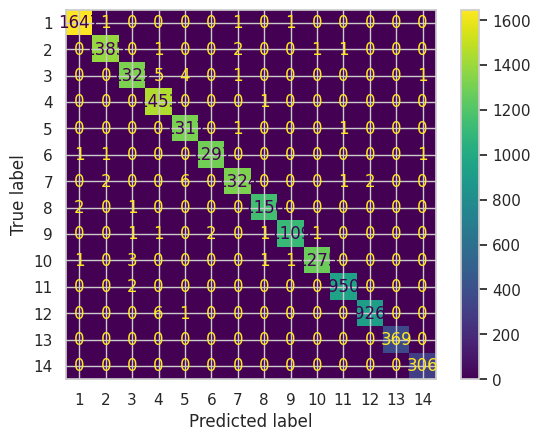

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and predictions_pca are your true labels and predicted labels, respectively

# Ensure that class_labels correspond to the unique classes in your data
class_labels = sorted(np.unique(np.concatenate((y_test, predictions))))

confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)

cm_display.plot()
plt.show()

### Feature analysis

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

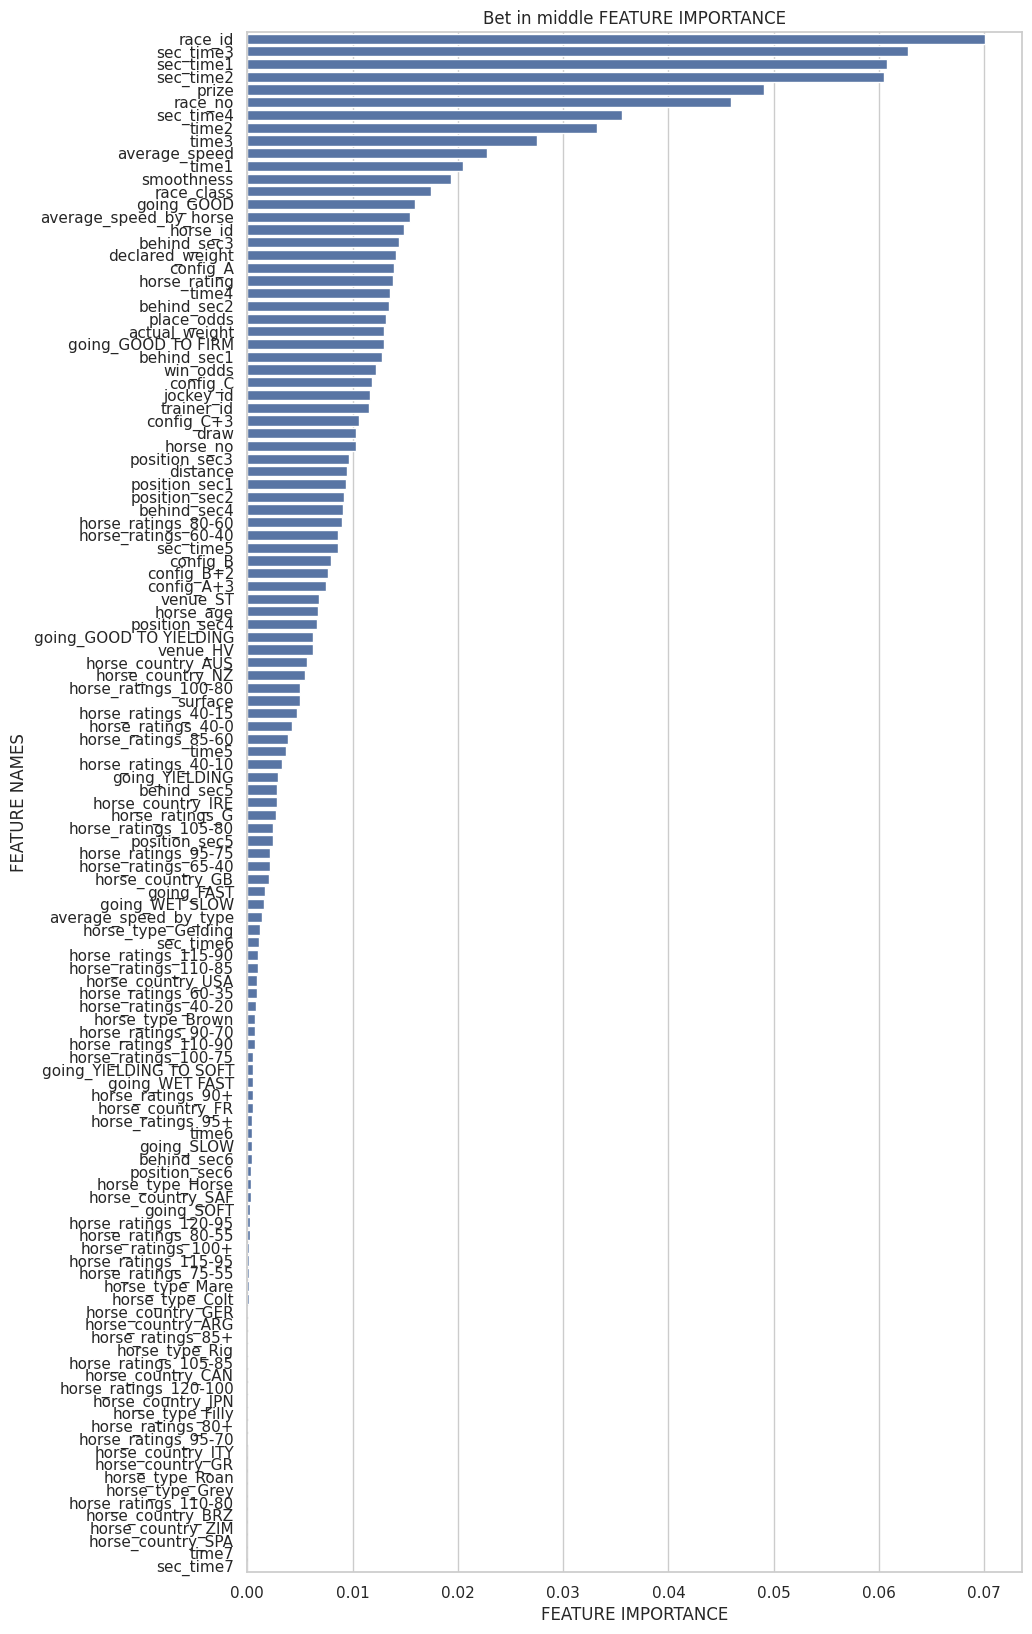

In [ ]:
plot_feature_importance(rf_won.feature_importances_,X_train_balanced_won.columns,'Bet in middle ')

We therefore observe that the most determining factors are

*   race id
*   sec_time1
*   prize
*   sec_time2
*   sec_time3

## Bet before the race

We observed that most predictive features are associated with real data, when horses are running. This suggests that performance matters.

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 79446
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   race_id                 79447 non-null  int64  
 1   date                    79447 non-null  object 
 2   venue                   79447 non-null  object 
 3   race_no                 79447 non-null  int64  
 4   config                  79447 non-null  object 
 5   surface                 79447 non-null  int64  
 6   distance                79447 non-null  int64  
 7   going                   79447 non-null  object 
 8   horse_ratings           79447 non-null  object 
 9   prize                   79447 non-null  float64
 10  race_class              79447 non-null  int64  
 11  sec_time1               79447 non-null  float64
 12  sec_time2               79447 non-null  float64
 13  sec_time3               79447 non-null  float64
 14  sec_time4               79447 non-null

### Drop all data only avilable when race start

In [ ]:
features = full_df.drop(columns=['date','horse_gear'], axis = 1)
features = features.drop(columns=['finish_time', 'win_combination1', 'won', 'result', 'lengths_behind' ,'place_combination1', 'place_dividend1', 'place_dividend2','place_dividend3','place_combination2','place_combination3','win_dividend1'], axis = 1)
#store the columns to be used as features in a DataFrame called "features"
features = features.drop(columns=[ 'sec_time1', 'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6', 'sec_time7', 'position_sec1','position_sec2','position_sec3','position_sec4','position_sec5','position_sec6','behind_sec1', 'behind_sec2','behind_sec3','behind_sec4','behind_sec5','behind_sec6','time1', 'time2', 'time3', 'time4', 'time5', 'time6'], axis = 1)
#store the binary classification target variable as "labels"
labels = full_df['win_combination1']

In [ ]:
features = pd.get_dummies(features)

### KNN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the training data
X_train_imputed = knn_imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer
X_test_imputed = knn_imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames if needed
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)


### Balance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_df, y_train_df = smote.fit_resample(X_train_imputed_df, y_train)


In [ ]:
X_train_df

,race_id,race_no,surface,distance,prize,race_class,time7,horse_no,horse_id,horse_age,...,horse_country_ZIM,horse_type_Brown,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
0,5766.000000,1.000000,1.0,1650.000000,600000.0,5.0,0.0,11.000000,650.000000,5.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
1,1104.000000,5.000000,0.0,1650.000000,850000.0,3.0,0.0,4.000000,2688.000000,3.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
2,1415.000000,4.000000,1.0,1650.000000,485000.0,5.0,0.0,3.000000,4250.000000,3.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
3,2926.000000,6.000000,0.0,1200.000000,900000.0,3.0,0.0,1.000000,3126.000000,3.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
4,3718.000000,1.000000,0.0,1000.000000,750000.0,6.0,0.0,12.000000,4005.000000,2.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93879,1159.007554,5.228356,0.0,1600.000000,625000.0,4.0,0.0,5.598489,2114.668797,3.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
93880,4586.000000,4.000000,0.0,1600.000000,575000.0,5.0,0.0,6.779890,853.866084,3.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
93881,6122.000000,4.000000,0.0,1000.000000,840000.0,4.0,0.0,9.005865,4263.655743,4.005865,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
93882,942.455576,3.844998,0.0,1215.500221,485000.0,5.0,0.0,6.310004,2847.790481,3.000000,...,0.0,0.0,0.0,0.0,0.077501,0.0,0.922499,0.0,0.0,0.0


### Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    # Add more parameters to tune as needed
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit the randomized search to the data
random_search.fit(X_train_df, y_train_df)

# Print every combination and its corresponding cross-validation score
results = random_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Parameters: {params}, Mean Test Score: {mean_score}")

# Print the best parameters and corresponding accuracy
print("\nBest Parameters: ", random_search.best_params_)
print("Best Cross-Validation Accuracy: ", random_search.best_score_)

# Evaluate the model on the test set
best_rf_model = random_search.best_estimator_
test_predictions = best_rf_model.predict(X_test_imputed_df)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"\nTest Accuracy: {test_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Parameters: {'n_estimators': 50, 'max_depth': 10}, Mean Test Score: 0.3396952166752338
Parameters: {'n_estimators': 100, 'max_depth': 10}, Mean Test Score: 0.352189242321337
Parameters: {'n_estimators': 150, 'max_depth': 10}, Mean Test Score: 0.35695043676234184
Parameters: {'n_estimators': 50, 'max_depth': 20}, Mean Test Score: 0.6492785585461948
Parameters: {'n_estimators': 100, 'max_depth': 20}, Mean Test Score: 0.673169553610164
Parameters: {'n_estimators': 150, 'max_depth': 20}, Mean Test Score: 0.684864798808449
Parameters: {'n_estimators': 50, 'max_depth': 30}, Mean Test Score: 0.721910838961417
Parameters: {'n_estimators': 100, 'max_depth': 30}, Mean Test Score: 0.74533323285595
Parameters: {'n_estimators': 150, 'max_depth': 30}, Mean Test Score: 0.7551005461381457

Best Parameters:  {'n_estimators': 150, 'max_depth': 30}
Best Cross-Validation Accuracy:  0.7551005461381457

Test Accuracy: 0.7779735682819383


In [ ]:
rf_before = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=30)
rf_before.fit(X_train_df, y_train_df)


predictions_before = rf_before.predict(X_test_imputed_df)

train_acc = rf_before.score(X_train_df, y_train_df)
test_acc = rf_before.score(X_test_imputed_df, y_test)

In [ ]:
train_acc

1.0

In [ ]:
test_acc

0.7779735682819383

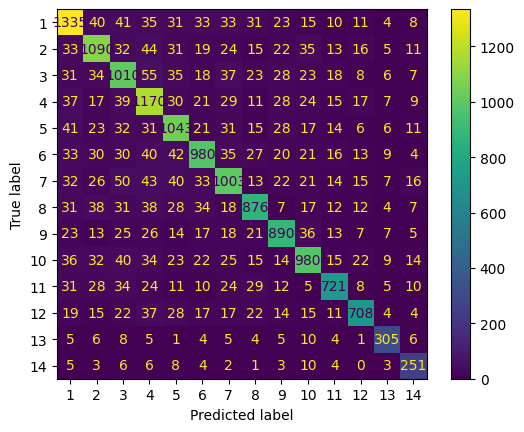

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and predictions_pca are your true labels and predicted labels, respectively

# Ensure that class_labels correspond to the unique classes in your data
class_labels = sorted(np.unique(np.concatenate((y_test, predictions_before))))

confusion_matrix = metrics.confusion_matrix(y_test, predictions_before)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)

cm_display.plot()
plt.show()

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

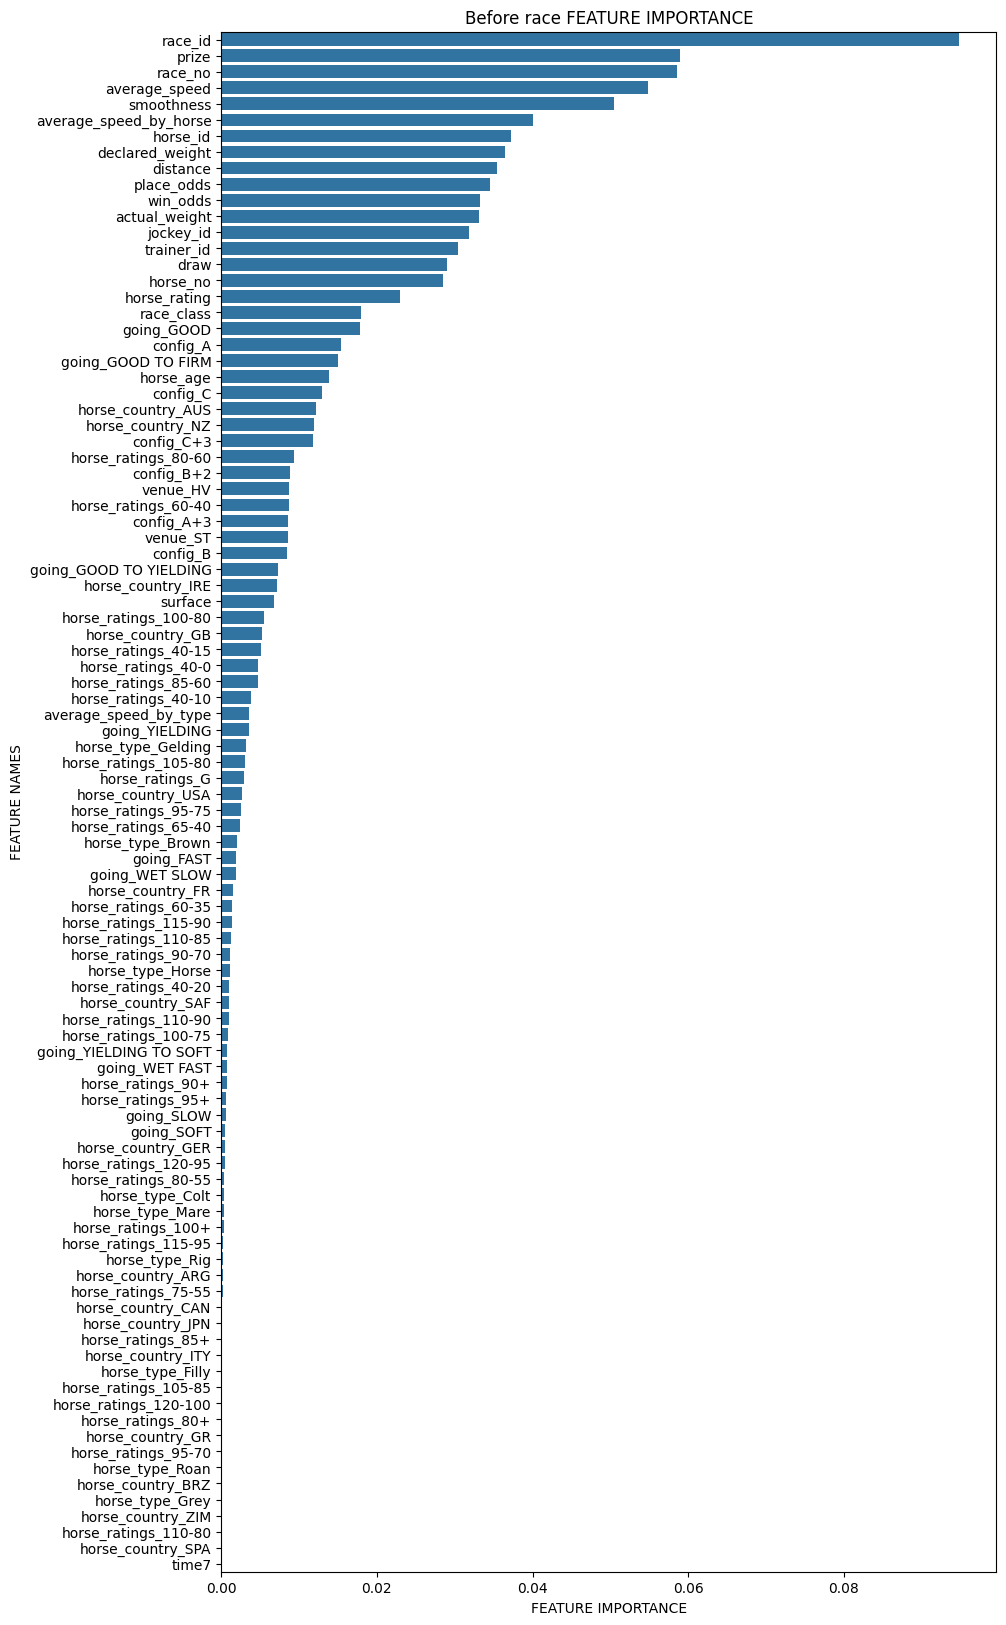

In [ ]:
plot_feature_importance(rf_before.feature_importances_,X_train_df.columns,'Before race ')

# Regression

In [ ]:
features = full_df.drop(columns=['date','horse_gear'], axis = 1)
features = features.drop(columns=['finish_time', 'win_combination1', 'won', 'result', 'lengths_behind' ,'place_combination1', 'place_dividend1', 'place_dividend2','place_dividend3','place_combination2','place_combination3','win_dividend1'], axis = 1)
features = pd.get_dummies(features)


### KNN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the training data
X_train_imputed = knn_imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer
X_test_imputed = knn_imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames if needed
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)


### PCA

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# PCA is not scale-invariant - address scale-invariance
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(X_train_imputed_df)
x_test_sc = scaler.transform(X_test_imputed_df)
# Instantiate and Fit PCA
pca = PCA() #all components are kept
pca.fit(x_train_sc)


PCA()

In [ ]:
#explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
#cumulative explained variance ratios
cum_evr = [explained_variance_ratios[0]]
for i in range(1, len(explained_variance_ratios)):
  cum_evr.append(explained_variance_ratios[i] + cum_evr[i-1])

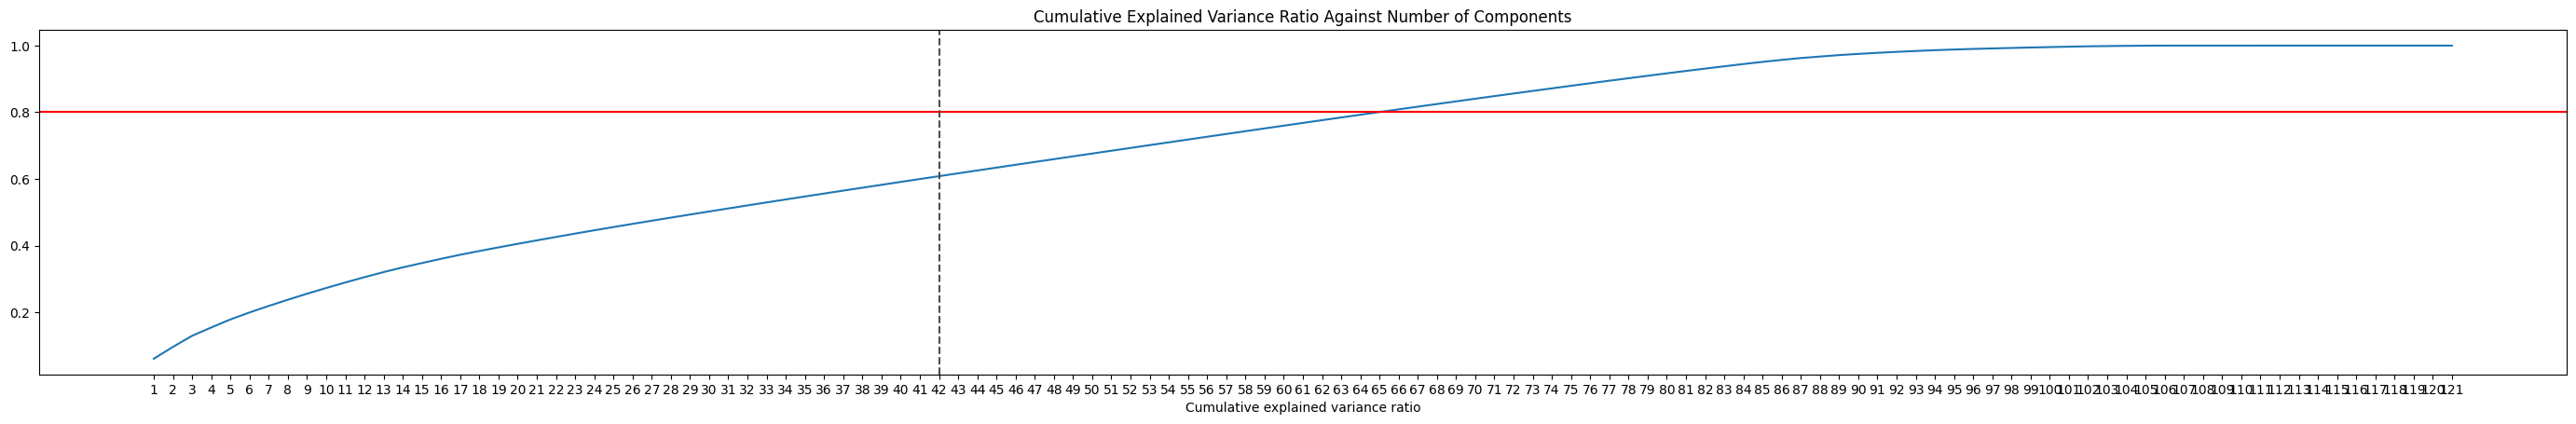

In [ ]:
# plot to find optimal number of components to use
plt.figure().set_figwidth(35)
plt.plot(np.arange(1, len(cum_evr) + 1), cum_evr)
plt.xticks(range(1, len(cum_evr) + 1))
plt.axhline(y=0.8, color='r')
plt.axvline(x=42, color='0.3', linestyle='--')  #mark the cross point
plt.title('Cumulative Explained Variance Ratio Against Number of Components')
plt.xlabel('Number of components')
plt.xlabel('Cumulative explained variance ratio')
plt.show()

In [ ]:
# Refit and transform on training with parameter n (as deduced from the last step)
pca = PCA(n_components=65)
X_train_pca = pca.fit_transform(x_train_sc)
explained_variance_ratios = pca.explained_variance_ratio_

# Transform on Testing Set and store it as `x_test_pca`
X_test_pca = pca.transform(x_test_sc)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Instantiate RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

# Train the model on the balanced, reduced-dimensional data
rf_reg.fit(X_train_pca, y_train)

# Predictions for training and testing sets
predictions_train = rf_reg.predict(X_train_pca)
predictions_test = rf_reg.predict(X_test_pca)

# Evaluate the model performance
train_mse = mean_squared_error(y_train, predictions_train)
test_mse = mean_squared_error(y_test, predictions_test)

# Print the mean squared error for training and testing sets
print(f'Training Mean Squared Error: {train_mse:.4f}')
print(f'Testing Mean Squared Error: {test_mse:.4f}')

Training Mean Squared Error: 11.5689
Testing Mean Squared Error: 12.5167


### Feature importance analysis

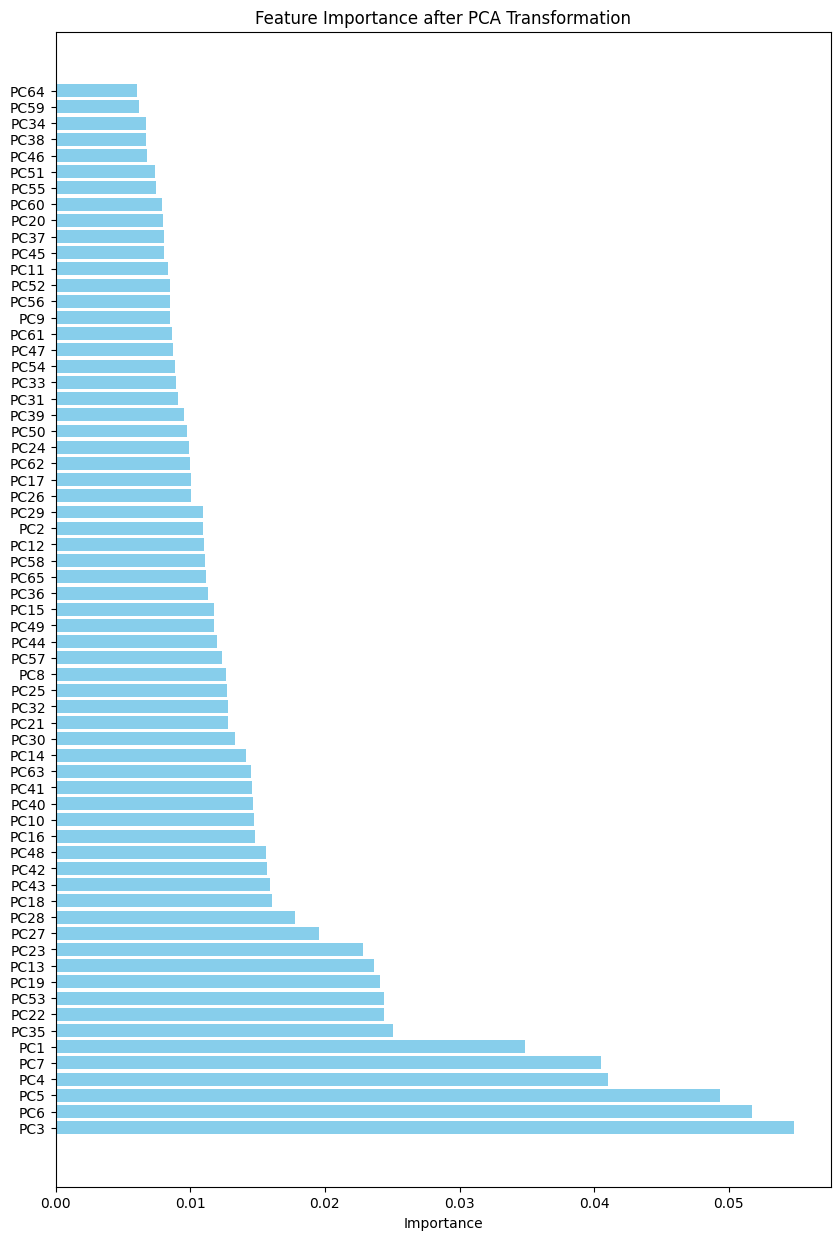

In [ ]:
feature_importances = rf_reg.feature_importances_

# Get the names of the original features
original_feature_names = X_train_imputed_df.columns

# Check the number of components obtained from PCA
n_components = len(feature_importances)

# Get the names of the principal components
pca_component_names = [f'PC{i+1}' for i in range(n_components)]

# Create a DataFrame to store the feature importances and their corresponding names
feature_importance_df = pd.DataFrame({'PCA Component': pca_component_names,
                                      'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.barh(feature_importance_df['PCA Component'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance after PCA Transformation')
plt.show()

In [ ]:
pca.components_

array([[-2.05139994e-02, -7.57506700e-03, -2.19203499e-02, ...,
         2.46791431e-03, -9.20907866e-05, -1.02146301e-02],
       [-4.36548474e-03,  5.90882222e-02,  3.58243753e-02, ...,
         3.27804287e-03,  5.10806822e-03,  4.90933010e-03],
       [-2.72500799e-02, -1.28805873e-01,  5.69301569e-02, ...,
        -1.30983382e-02, -8.02999140e-03, -2.75281315e-03],
       ...,
       [ 3.67456490e-02, -3.31723483e-02, -4.68668297e-03, ...,
        -3.18905247e-02, -1.80170583e-01,  1.14447362e-01],
       [ 1.61399741e-02,  1.46735643e-03,  4.81265266e-02, ...,
        -4.46094274e-02,  1.14263357e-01,  4.23309867e-02],
       [-1.94529921e-02,  5.14895720e-03,  6.48574398e-02, ...,
        -1.04567470e-01,  2.34312725e-01,  6.23487090e-02]])

In [ ]:
# Get the number of top features to display
top_features_count = 3

# Iterate through each principal component
for i, component in enumerate(pca.components_):
    # Get the indices of the top three features for the current component
    top_feature_indices = np.argsort(np.abs(component))[::-1][:top_features_count]

    # Get the names of the top three features
    top_three_features = X_train_imputed_df.columns[top_feature_indices]

    # Print the result for each principal component
    print(f'Top three features for PCA component {i+1}: {top_three_features.tolist()}')

Top three features for PCA component 1: ['distance', 'average_speed', 'sec_time3']
Top three features for PCA component 2: ['position_sec2', 'position_sec1', 'behind_sec2']
Top three features for PCA component 3: ['time1', 'sec_time1', 'sec_time2']
Top three features for PCA component 4: ['race_no', 'venue_ST', 'venue_HV']
Top three features for PCA component 5: ['prize', 'time6', 'sec_time6']
Top three features for PCA component 6: ['race_no', 'race_class', 'horse_ratings_80-60']
Top three features for PCA component 7: ['surface', 'config_A', 'race_class']
Top three features for PCA component 8: ['smoothness', 'time3', 'time2']
Top three features for PCA component 9: ['actual_weight', 'horse_no', 'win_odds']
Top three features for PCA component 10: ['horse_type_Gelding', 'smoothness', 'time3']
Top three features for PCA component 11: ['average_speed_by_type', 'horse_type_Roan', 'horse_type_Colt']
Top three features for PCA component 12: ['horse_type_Gelding', 'horse_type_Brown', 'posi

We check the top three features embedded in the top pca components, which are


*   Top three features for PCA component 3:'['time1', 'sec_time1', 'sec_time2']
*   Top three features for PCA component 6: ['race_no', 'race_class', 'horse_ratings_80-60']
*   Top three features for PCA component 5: ['prize', 'time6', 'sec_time6']
*   Top three features for PCA component 4: ['race_no', 'venue_ST', 'venue_HV']

## Random

In [ ]:
# # Get the number of top features to display
# top_features_count = 3

# # Iterate through each principal component
# for i, component in enumerate(pca.components_):
#     # Get the indices of the top three features for the current component
#     top_feature_indices = np.argsort(np.abs(component))[::-1][:top_features_count]

#     # Get the names of the top three features
#     top_three_features = X_train_imputed_df.columns[top_feature_indices]

#     # Print the result for each principal component
#     print(f'Top three features for PCA component {i+1}: {top_three_features.tolist()}')

Top three features for PCA component 1: ['distance', 'average_speed', 'sec_time3']
Top three features for PCA component 2: ['position_sec2', 'position_sec1', 'behind_sec2']
Top three features for PCA component 3: ['time1', 'sec_time1', 'sec_time2']
Top three features for PCA component 4: ['race_no', 'venue_ST', 'venue_HV']
Top three features for PCA component 5: ['prize', 'horse_ratings_G', 'time6']
Top three features for PCA component 6: ['race_no', 'race_class', 'horse_ratings_80-60']
Top three features for PCA component 7: ['surface', 'config_A', 'race_class']
Top three features for PCA component 8: ['smoothness', 'time3', 'time2']
Top three features for PCA component 9: ['actual_weight', 'horse_no', 'win_odds']
Top three features for PCA component 10: ['horse_type_Gelding', 'smoothness', 'time3']
Top three features for PCA component 11: ['win_dividend1', 'place_dividend1', 'average_speed_by_type']
Top three features for PCA component 12: ['average_speed_by_type', 'horse_type_Roan',

I want to further take out all the section_time related stuff, and observe the data we would only have before the race start. What features are most trustful.

In [ ]:
# y_pred_proba = rf_won.predict_proba(X_test_pca)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

# #create ROC curve
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 70 features, but RandomForestClassifier is expecting 127 features as input.

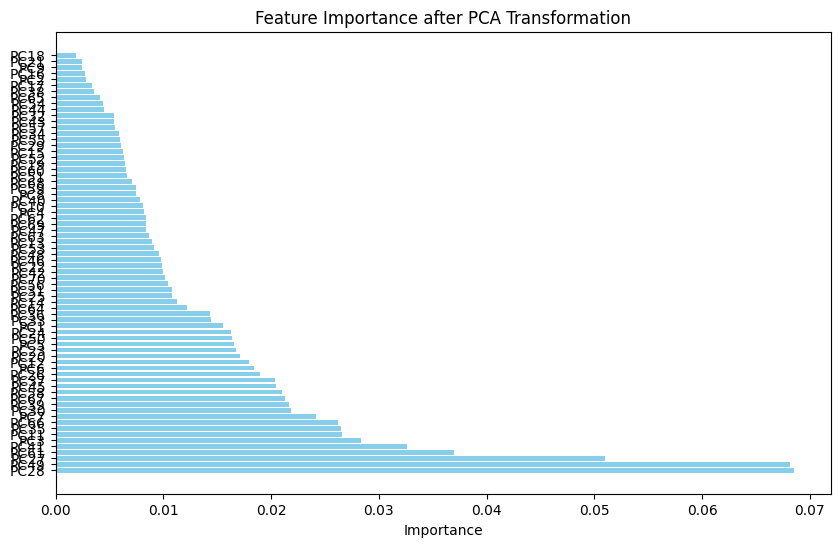

In [ ]:
# feature_importances = rf_won.feature_importances_

# # Get the names of the original features
# original_feature_names = X_train_imputed_df.columns

# # Check the number of components obtained from PCA
# n_components = len(feature_importances)

# # Get the names of the principal components
# pca_component_names = [f'PC{i+1}' for i in range(n_components)]

# # Create a DataFrame to store the feature importances and their corresponding names
# feature_importance_df = pd.DataFrame({'Original Feature': original_feature_names[:n_components],
#                                       'PCA Component': pca_component_names,
#                                       'Importance': feature_importances})

# # Sort the DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['PCA Component'], feature_importance_df['Importance'], color='skyblue')
# plt.xlabel('Importance')
# plt.title('Feature Importance after PCA Transformation')
# plt.show()

In [ ]:
# pca.components_

array([[-2.07258306e-02, -7.74969362e-03, -2.15382138e-02, ...,
         2.44781017e-03, -4.55622857e-05, -1.02848475e-02],
       [-4.59449364e-03,  6.17580000e-02,  3.47919552e-02, ...,
         3.43065669e-03,  5.28154824e-03,  4.72638206e-03],
       [-2.66292915e-02, -1.26829475e-01,  5.78412104e-02, ...,
        -1.27469149e-02, -8.02659133e-03, -2.38316987e-03],
       ...,
       [-4.90042247e-02,  3.42702408e-03, -3.60226464e-03, ...,
         1.14120529e-01, -5.33569660e-03, -3.37555962e-02],
       [-3.71381495e-02,  2.15041513e-02,  1.15525625e-02, ...,
        -3.39510707e-02,  2.60597379e-01, -2.72711171e-02],
       [-4.23490003e-03,  4.36784676e-02,  2.64667443e-04, ...,
         1.24628851e-01,  1.26207717e-01, -1.52985508e-01]])